In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the CSV file
file_path = '/content/drive/MyDrive/Statistic_data/Gene.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

In [5]:
# Rename columns
data.columns = ['Time', 'Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']

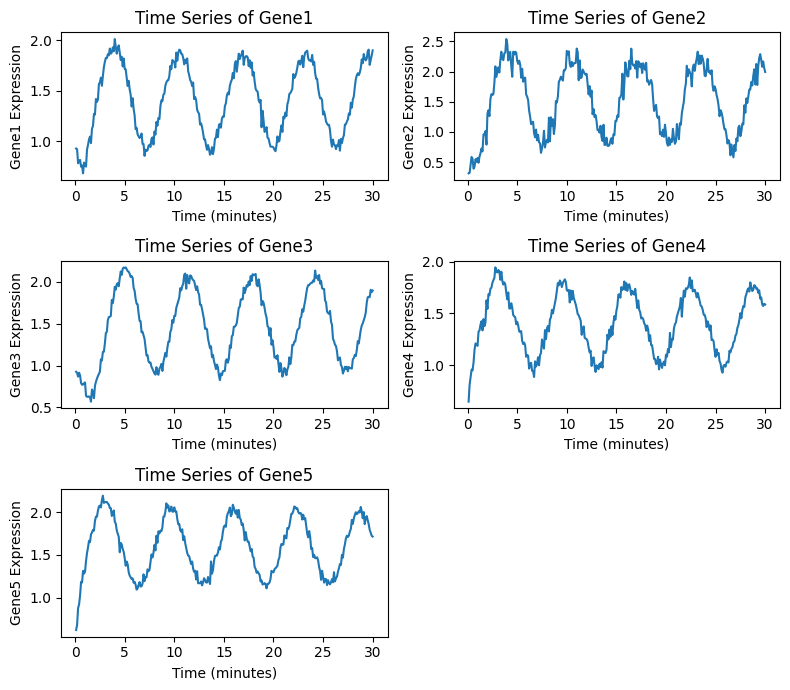

In [6]:
# Generate time series plots for each gene
plt.figure(figsize=(8, 7))
for i, gene in enumerate(data.columns[1:], 1):
    plt.subplot(3, 2, i)
    plt.plot(data['Time'], data[gene])
    plt.title(f'Time Series of {gene}')
    plt.xlabel('Time (minutes)')
    plt.ylabel(f'{gene} Expression')

plt.tight_layout()
plt.show()

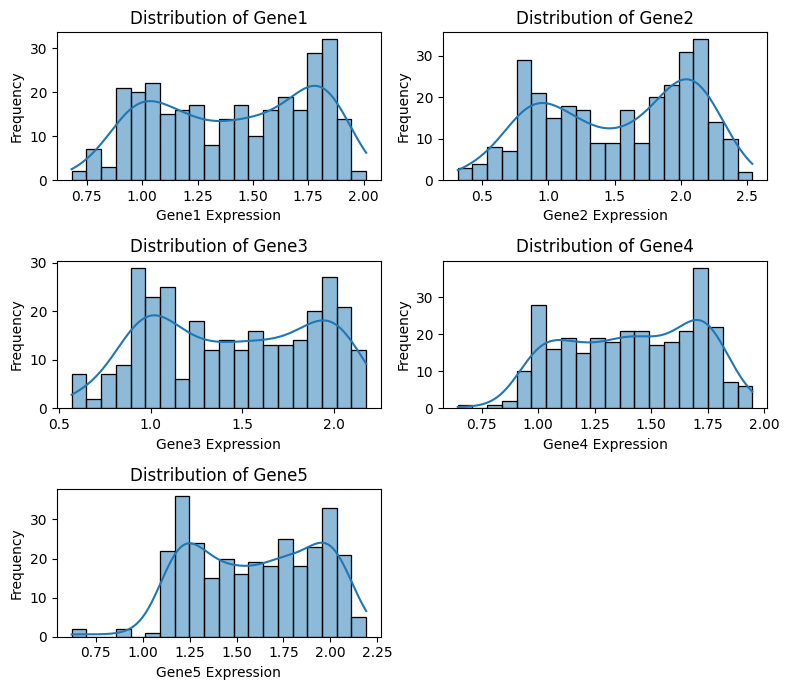

In [8]:
# Generating histograms and compute basic statistics for each gene
plt.figure(figsize=(8, 7))
for i, gene in enumerate(data.columns[1:], 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[gene], kde=True, bins=20)
    plt.title(f'Distribution of {gene}')
    plt.xlabel(f'{gene} Expression')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [9]:
# Computing basic statistics
statistics = data.describe().T
print(statistics)

       count       mean       std       min       25%        50%        75%  \
Time   300.0  15.050000  8.674676  0.100000  7.575000  15.050000  22.525000   
Gene1  300.0   1.409732  0.350823  0.681297  1.080878   1.425004   1.756066   
Gene2  300.0   1.526909  0.561252  0.314328  0.996164   1.598865   2.043225   
Gene3  300.0   1.448919  0.439598  0.569043  1.043129   1.446837   1.883614   
Gene4  300.0   1.412939  0.286732  0.644547  1.157918   1.427911   1.683787   
Gene5  300.0   1.599298  0.329305  0.622073  1.302045   1.619324   1.913093   

             max  
Time   30.000000  
Gene1   2.011843  
Gene2   2.540164  
Gene3   2.173947  
Gene4   1.946802  
Gene5   2.190523  


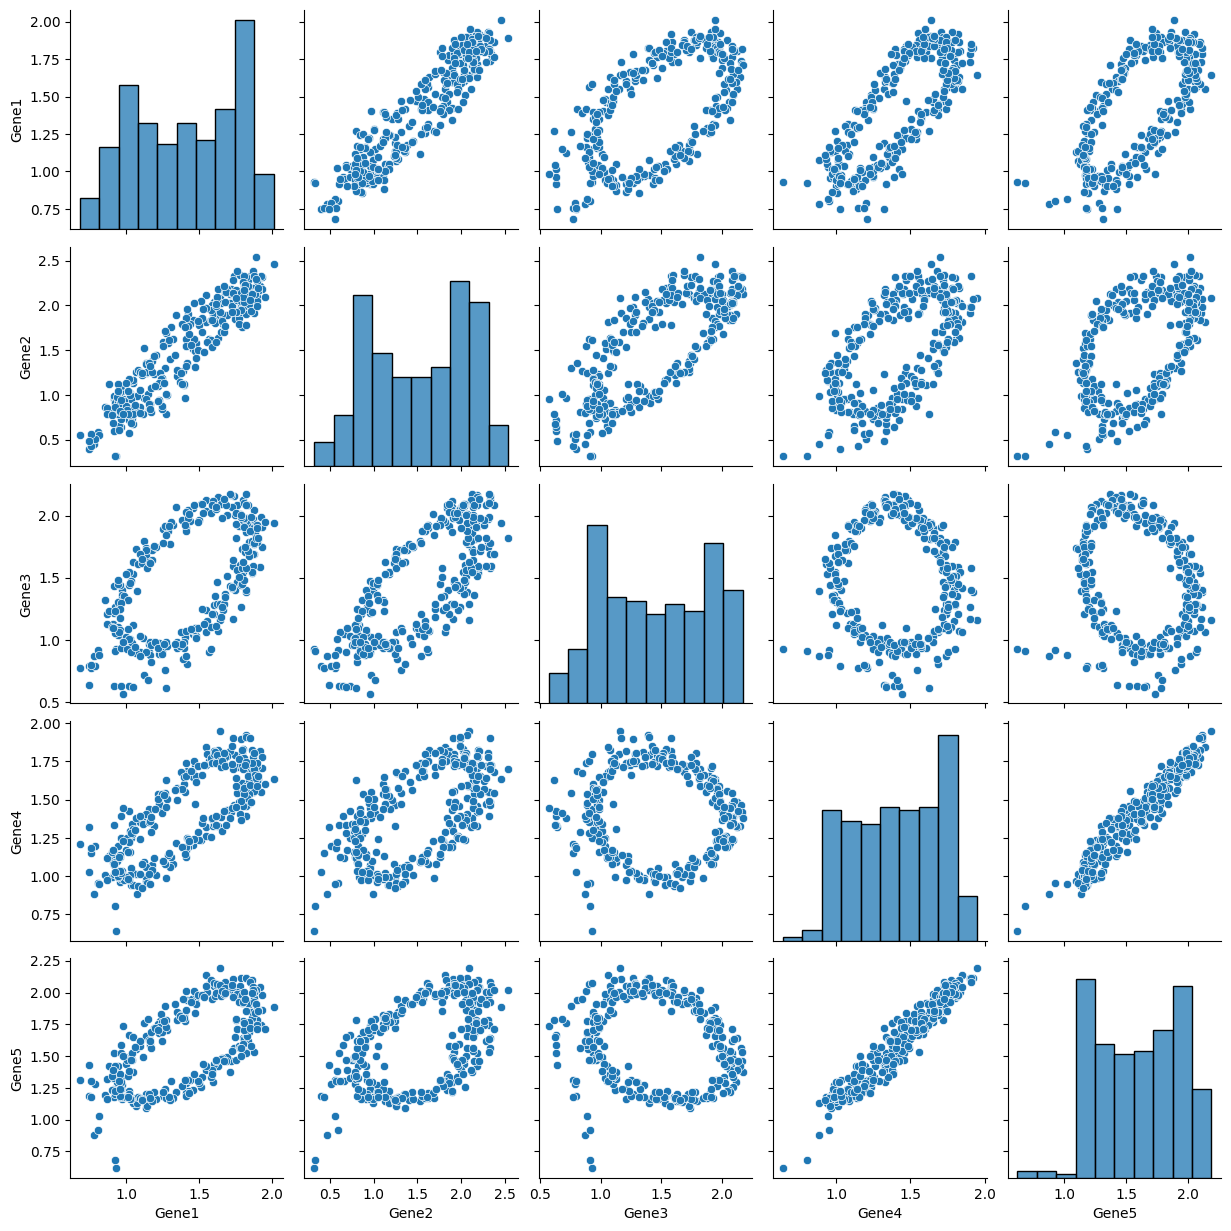

In [10]:
# Generating scatter plots and compute the correlation matrix
sns.pairplot(data.iloc[:, 1:])
plt.show()

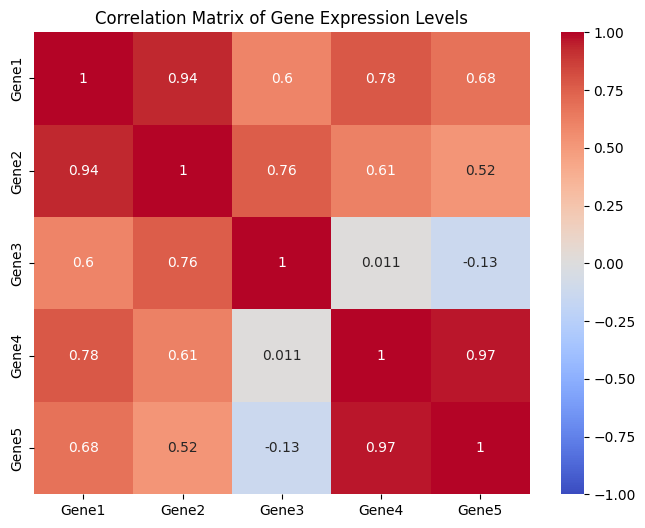

          Gene1     Gene2     Gene3     Gene4     Gene5
Gene1  1.000000  0.935592  0.599887  0.776839  0.675185
Gene2  0.935592  1.000000  0.762298  0.613526  0.517252
Gene3  0.599887  0.762298  1.000000  0.011024 -0.129928
Gene4  0.776839  0.613526  0.011024  1.000000  0.965901
Gene5  0.675185  0.517252 -0.129928  0.965901  1.000000


In [11]:
# Computing the correlation matrix
correlation_matrix = data.iloc[:, 1:].corr()

# Generating a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Gene Expression Levels')
plt.show()

print(correlation_matrix)

In [12]:

import numpy as np
import pandas as pd

# Loading the CSV file
file_path = '/content/drive/MyDrive/Statistic_data/Gene.csv'
data = pd.read_csv(file_path)

# Renaming columns
data.columns = ['Time', 'Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']

# Extracting input and output genes
X1 = data['Gene1'].values
X2 = data['Gene2'].values
X3 = data['Gene3'].values
X4 = data['Gene4'].values
Y = data['Gene5'].values

# Preparing design matrices for each model
X_models = []

# Model 1: y = θ1 * x4 + θ2 * x3^2 + θ_bias
X1_model = np.column_stack((X4, X3**2, np.ones_like(X4)))
X_models.append(X1_model)

# Model 2: y = θ1 * x4 + θ2 * x3^2 + θ3 * x1 + θ_bias
X2_model = np.column_stack((X4, X3**2, X1, np.ones_like(X4)))
X_models.append(X2_model)

# Model 3: y = θ1 * x3 + θ2 * x4 + θ3 * x1^3
X3_model = np.column_stack((X3, X4, X1**3))
X_models.append(X3_model)

# Model 4: y = θ1 * x4 + θ2 * x3^2 + θ3 * x1^3 + θ_bias
X4_model = np.column_stack((X4, X3**2, X1**3, np.ones_like(X4)))
X_models.append(X4_model)

# Model 5: y = θ1 * x4 + θ2 * x1 + θ3 * x3 + θ_bias
X5_model = np.column_stack((X4, X1, X3, np.ones_like(X4)))
X_models.append(X5_model)

# Estimate parameters for each model using Least Squares
theta_models = []
for X in X_models:
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y
    theta_models.append(theta)

# Display the estimated parameters for each model
for i, theta in enumerate(theta_models, 1):
    print(f"Model {i} parameters: {theta}")


Model 1 parameters: [ 1.10937994 -0.0384525   0.11994327]
Model 2 parameters: [ 0.88891179 -0.07581202  0.23202267  0.18998828]
Model 3 parameters: [-0.05085913  1.22075605 -0.0160156 ]
Model 4 parameters: [ 1.02094847 -0.05371769  0.01582106  0.22743813]
Model 5 parameters: [ 0.96045272  0.15983098 -0.18075365  0.27881493]


In [13]:
# Computing RSS for each model
rss_values = []
for i, X in enumerate(X_models):
    theta = theta_models[i]
    y_pred = X @ theta
    residuals = Y - y_pred
    rss = np.sum(residuals**2)
    rss_values.append(rss)

# Displaying the RSS for each model
for i, rss in enumerate(rss_values, 1):
    print(f"Model {i} RSS: {rss}")

Model 1 RSS: 1.4489784346159933
Model 2 RSS: 1.3474098303548918
Model 3 RSS: 1.61816373510907
Model 4 RSS: 1.415815331200586
Model 5 RSS: 1.4887255765072671


In [12]:
# Computing log-likelihood for each model
Y = data['Gene5'].values

# Number of data points
n = len(Y)
log_likelihoods = []
for rss in rss_values:
    sigma_squared = rss / n
    log_likelihood = -0.5 * n * np.log(2 * np.pi) - 0.5 * n * np.log(sigma_squared) - 0.5 * rss / sigma_squared
    log_likelihoods.append(log_likelihood)

# Displaying the log-likelihood for each model
for i, log_likelihood in enumerate(log_likelihoods, 1):
    print(f"Model {i} Log-Likelihood: {log_likelihood}")

Model 1 Log-Likelihood: 374.2569941942679
Model 2 Log-Likelihood: 385.1581954400283
Model 3 Log-Likelihood: 357.69200981133366
Model 4 Log-Likelihood: 377.7299755948509
Model 5 Log-Likelihood: 370.1977458094211


In [13]:
# Computing AIC and BIC for each model
# Numbering of parameters in each model
k_values = [X.shape[1] for X in X_models]
aic_values = []
bic_values = []
for i, log_likelihood in enumerate(log_likelihoods):
    k = k_values[i]
    aic = 2 * k - 2 * log_likelihood
    bic = k * np.log(n) - 2 * log_likelihood
    aic_values.append(aic)
    bic_values.append(bic)

# Displaying the AIC and BIC for each model
for i, (aic, bic) in enumerate(zip(aic_values, bic_values), 1):
    print(f"Model {i} AIC: {aic}, BIC: {bic}")

Model 1 AIC: -742.5139883885358, BIC: -731.4026409645672
Model 2 AIC: -762.3163908800566, BIC: -747.5012609814318
Model 3 AIC: -709.3840196226673, BIC: -698.2726721986987
Model 4 AIC: -747.4599511897018, BIC: -732.6448212910769
Model 5 AIC: -732.3954916188422, BIC: -717.5803617202174


In [18]:
# Estimating parameters for each model using Least Squares
theta_models = []
residuals_models = []
for X in X_models:
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y
    theta_models.append(theta)
    y_pred = X @ theta
    residuals = Y - y_pred
    residuals_models.append(residuals)

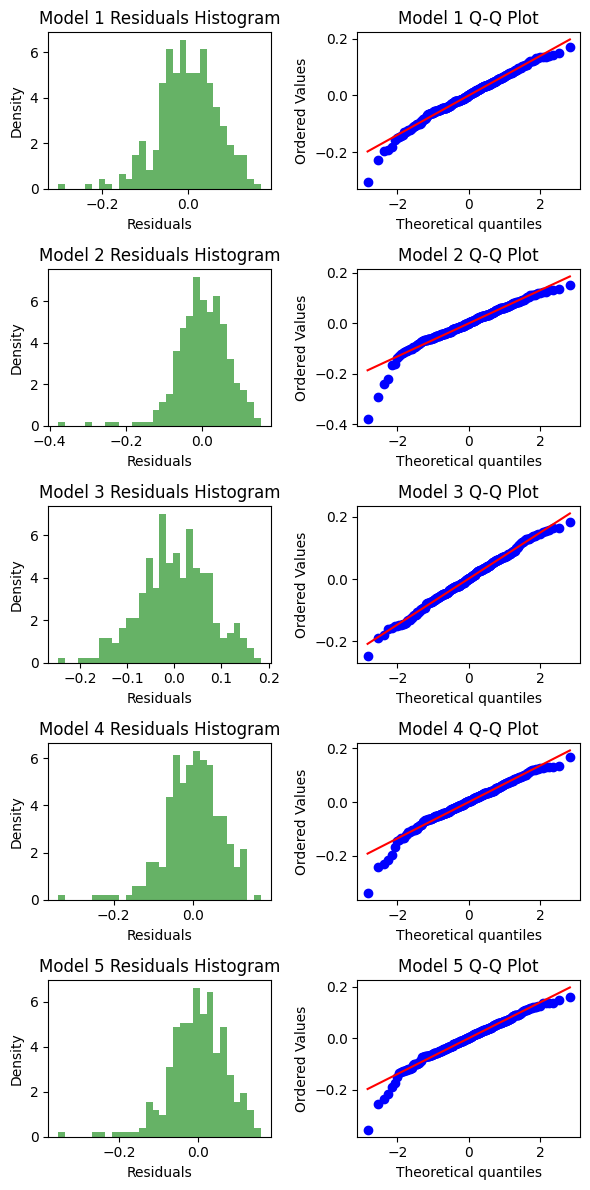

In [19]:
import matplotlib.pyplot as plt
import scipy.stats as stats
# Plot the error distributions and Q-Q plots
fig, axes = plt.subplots(len(X_models), 2, figsize=(6, 12))
for i, residuals in enumerate(residuals_models):
    # Histogram
    ax_hist = axes[i, 0]
    ax_hist.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
    ax_hist.set_title(f'Model {i+1} Residuals Histogram')
    ax_hist.set_xlabel('Residuals')
    ax_hist.set_ylabel('Density')

    # Q-Q plot
    ax_qq = axes[i, 1]
    stats.probplot(residuals, dist="norm", plot=ax_qq)
    ax_qq.set_title(f'Model {i+1} Q-Q Plot')

plt.tight_layout()
plt.show()

In [20]:

from sklearn.model_selection import train_test_split
from scipy.stats import t
# Preparing the design matrix for Model 2
X_best_model = np.column_stack((X4, X3**2, X1, np.ones_like(X4)))

# Spliting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_best_model, Y, test_size=0.2, random_state=42)



In [21]:
# Estimate parameters for the training set using Least Squares
theta_best = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Predict the output for the testing set
y_pred_test = X_test @ theta_best

In [22]:
# Compute residuals for the training set
residuals_train = y_train - (X_train @ theta_best)
rss_train = np.sum(residuals_train**2)
n_train = X_train.shape[0]
p = X_train.shape[1]
sigma_squared = rss_train / (n_train - p)

In [20]:
# Compute the standard error of the predictions
var_y_pred_test = sigma_squared * np.diagonal(X_test @ np.linalg.inv(X_train.T @ X_train) @ X_test.T)
se_y_pred_test = np.sqrt(var_y_pred_test)
# Compute the 99.7% confidence intervals (3 standard deviations)
confidence_interval = 3 * se_y_pred_test


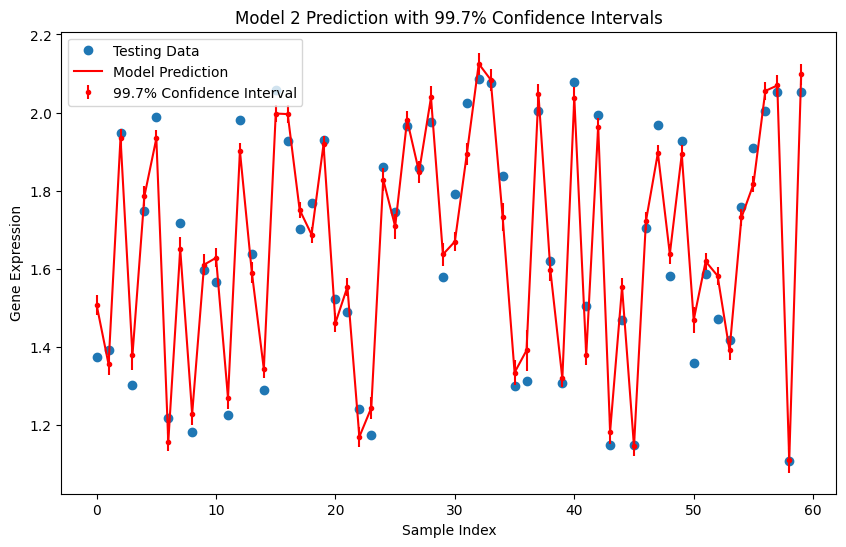

In [22]:
# Plot the model predictions with confidence intervals and testing data samples
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), y_test, 'o', label='Testing Data')
plt.plot(np.arange(len(y_test)), y_pred_test, 'r-', label='Model Prediction')
plt.errorbar(np.arange(len(y_test)), y_pred_test, yerr=confidence_interval, fmt='r.', label='99.7% Confidence Interval')

plt.xlabel('Sample Index')
plt.ylabel('Gene Expression')
plt.title('Model 2 Prediction with 99.7% Confidence Intervals')
plt.legend()
plt.show()



In [23]:
# Print the estimated parameters
print("Estimated parameters (θ):", theta_best)

Estimated parameters (θ): [ 0.94436453 -0.06436462  0.17100714  0.17165924]


**Number 3**

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, mode

# Load the CSV file
file_path = '/content/drive/MyDrive/Statistic_data/Gene.csv'
data = pd.read_csv(file_path)

# Rename columns
data.columns = ['Time', 'Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']

# Compute sample mean and variance for each gene
means = data[['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']].mean()
variances = data[['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']].var()
std_devs = data[['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']].std()
n = len(data)

In [25]:
# Confidence levels and their corresponding critical values from the t-distribution
confidence_levels = [0.90, 0.95, 0.99]
critical_values = [t.ppf((1 + cl) / 2., n-1) for cl in confidence_levels]

# Compute the confidence intervals
confidence_intervals = {}
for gene in means.index:
    gene_intervals = []
    mean = means[gene]
    std_err = std_devs[gene] / np.sqrt(n)
    for cv in critical_values:
        margin_of_error = cv * std_err
        ci = (mean - margin_of_error, mean + margin_of_error)
        gene_intervals.append(ci)
    confidence_intervals[gene] = gene_intervals

In [26]:
# Display the results
print("Sample means and variances:")
for gene in means.index:
    print(f"{gene}: Mean = {means[gene]:.4f}, Variance = {variances[gene]:.4f}")

print("\nConfidence Intervals (90%, 95%, 99%):")
for gene, intervals in confidence_intervals.items():
    print(f"\n{gene}:")
    for i, ci in enumerate(intervals):
        print(f"{confidence_levels[i]*100:.0f}% CI: {ci}")

Sample means and variances:
Gene1: Mean = 1.4097, Variance = 0.1231
Gene2: Mean = 1.5269, Variance = 0.3150
Gene3: Mean = 1.4489, Variance = 0.1932
Gene4: Mean = 1.4129, Variance = 0.0822
Gene5: Mean = 1.5993, Variance = 0.1084

Confidence Intervals (90%, 95%, 99%):

Gene1:
90% CI: (1.3763126939666046, 1.4431520109400622)
95% CI: (1.3698724118627763, 1.4495922930438905)
99% CI: (1.3572244854732256, 1.4622402194334412)

Gene2:
90% CI: (1.4734431891635333, 1.5803738392497997)
95% CI: (1.4631399188237901, 1.590677109589543)
99% CI: (1.4429055559918813, 1.6109114724214517)

Gene3:
90% CI: (1.4070421892471736, 1.4907950393394929)
95% CI: (1.398972208792281, 1.4988650197943856)
99% CI: (1.383123754157363, 1.5147134744293034)

Gene4:
90% CI: (1.3856247988939492, 1.440253537146051)
95% CI: (1.3803610633973784, 1.4455172726426218)
99% CI: (1.3700237306499328, 1.4558546053900674)

Gene5:
90% CI: (1.5679278889513972, 1.630667665948603)
95% CI: (1.5618826167779287, 1.6367129381220715)
99% CI: (1.5

In [28]:
# Compute scale (standard deviation) and skewness for each gene
scales = data[['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']].std()
skewnesses = data[['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']].apply(skew)

# Compute sample mean and standard deviation for normal distribution overlay
means = data[['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']].mean()

In [29]:
# Print scale and skewness
print("Scale (Standard Deviation) and Skewness:")
for gene in scales.index:
    print(f"{gene}: Scale = {scales[gene]:.4f}, Skewness = {skewnesses[gene]:.4f}")

Scale (Standard Deviation) and Skewness:
Gene1: Scale = 0.3508, Skewness = -0.1348
Gene2: Scale = 0.5613, Skewness = -0.2141
Gene3: Scale = 0.4396, Skewness = -0.0196
Gene4: Scale = 0.2867, Skewness = -0.1663
Gene5: Scale = 0.3293, Skewness = -0.1495


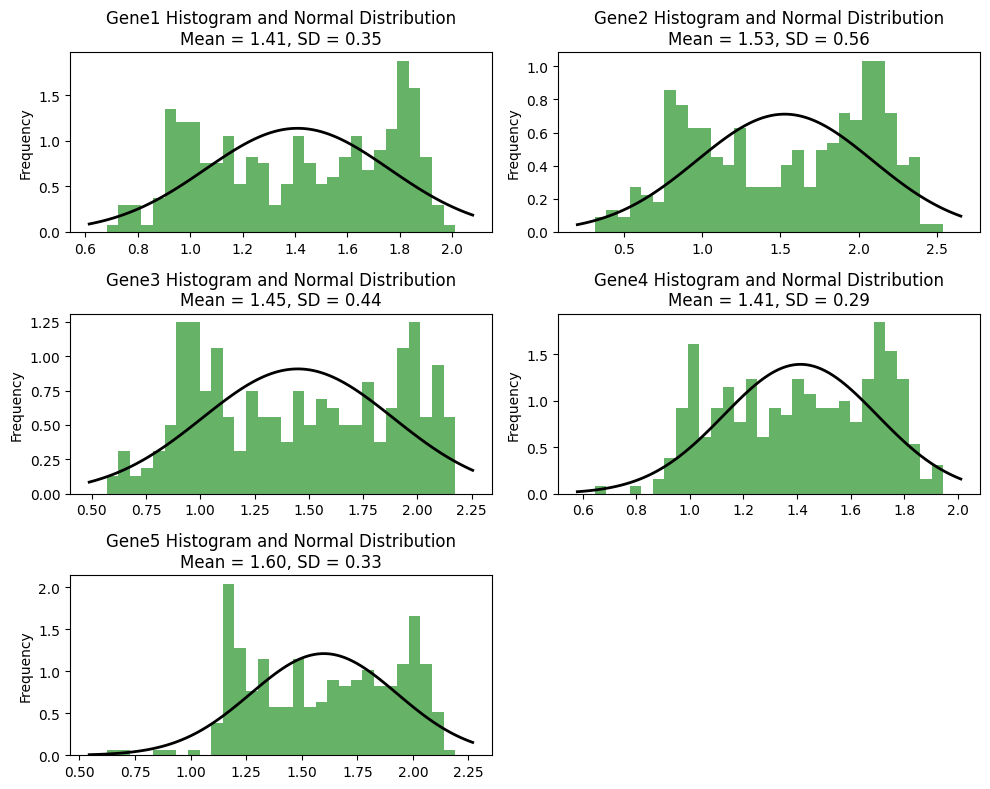

In [39]:
# Plot histograms with overlaid normal distribution and mode
plt.figure(figsize=(10, 8))
for i, gene in enumerate(means.index, 1):
    plt.subplot(3, 2, i)
    # Histogram
    data[gene].plot(kind='hist', bins=30, density=True, alpha=0.6, color='g')
    # Normal distribution overlay
    min_xlim, max_xlim = plt.xlim()
    x = np.linspace(min_xlim, max_xlim, 100)
    p = norm.pdf(x, means[gene], scales[gene])
    plt.plot(x, p, 'k', linewidth=2)
    title = f"{gene} Histogram and Normal Distribution\nMean = {means[gene]:.2f}, SD = {scales[gene]:.2f}"
    plt.title(title)

plt.tight_layout()
plt.show()